In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =[2, 5, 12, 15, 19, 4, 6, 11, 16, 18, 12, 12, 42, 6, 56, 34, 23, 11]

np.quantile(data, [.25, .75])


array([ 7.25, 18.75])

In [3]:
df = pd.read_csv("KickStarterProjects.csv")
df.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


In [4]:
df.info()
print(df.shape)
df.drop(['currency', 'goal'], axis= 1, inplace= True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB
(378661, 14)


(378661, 12)

In [5]:
df.isnull().sum().sort_values(ascending=False)

name                4
ID                  0
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [6]:
df.isnull().sum(axis=1).value_counts()

0    378657
1         4
dtype: int64

In [7]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    378657
1         4
dtype: int64

In [8]:
df['backers'].describe()

count    378661.000000
mean        105.617476
std         907.185035
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64

C:\Users\kazayu01\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='backers'>

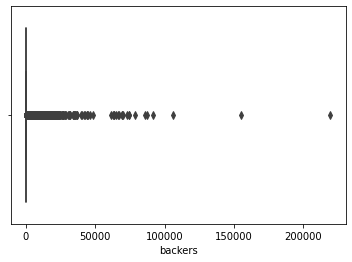

In [9]:
sns.boxplot(df['backers'])

In [10]:
df.dropna(subset=["name"], inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

ID                  0
name                0
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [12]:
# df['state'].sum(axis= 1)


In [13]:
df.describe()


,ID,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786570e+05,3.786570e+05,378657.000000,3.786570e+05,3.786570e+05
mean,1.074732e+09,9.683080e+03,105.618544,9.059018e+03,4.545425e+04
std,6.190872e+08,9.563651e+04,907.189767,9.097382e+04,1.152956e+06
min,5.971000e+03,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382499e+08,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,6.200000e+02,12.000000,6.243800e+02,5.500000e+03
75%,1.610149e+09,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


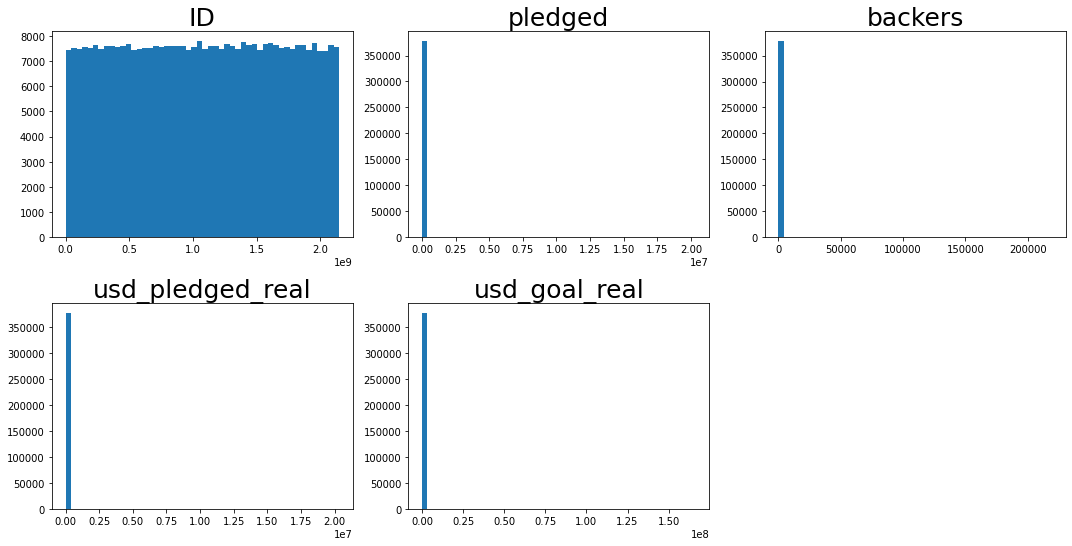

In [14]:


dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378657 non-null  object 
 3   category          378657 non-null  object 
 4   deadline          378657 non-null  object 
 5   launched          378657 non-null  object 
 6   pledged           378657 non-null  float64
 7   state             378657 non-null  object 
 8   backers           378657 non-null  int64  
 9   country           378657 non-null  object 
 10  usd_pledged_real  378657 non-null  float64
 11  usd_goal_real     378657 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 37.6+ MB


In [16]:
df['name'].unique()

array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

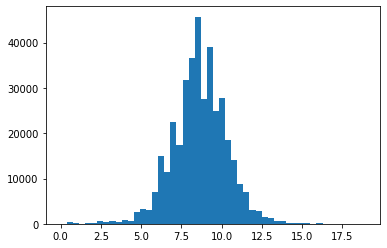

In [17]:
col = 'usd_goal_real'
    
df[col + "_log"] = np.log(df['usd_goal_real'] + 1)
    
plt.hist(df[col + "_log"], bins=50)
plt.show()

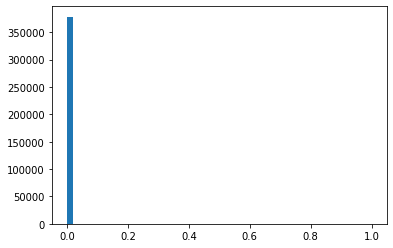

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


df[[col + "_minmax"]] = MinMaxScaler().fit_transform(df[['usd_goal_real']])

plt.hist(df[col + "_minmax"], bins=50)
plt.show()


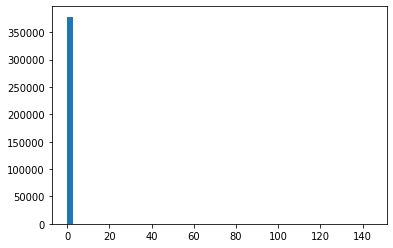

In [19]:
df[[col + "_standart"]] = StandardScaler().fit_transform(df[['usd_goal_real']])

plt.hist(df[col + "_standart"], bins=50)
plt.show()

In [20]:
list= []

for col in df['name']:
    
    list.append(col)

len(list)

378657

In [21]:
len(df['name'].unique())

375722

In [22]:
df['launch_month'] = pd.to_datetime(df['launched']).dt.month # adding in a feature that's just the month
df['launch_month'].value_counts().sort_values(ascending = False)

7     34477
1     34346
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31381
4     31038
2     29876
12    24428
Name: launch_month, dtype: int64

In [23]:
df.groupby(['category']).mean().sort_values(by='usd_pledged_real', ascending=False)

,ID,pledged,backers,usd_pledged_real,usd_goal_real,usd_goal_real_log,usd_goal_real_minmax,usd_goal_real_standart,launch_month
category,,,,,,,,,
Design,1.078315e+09,27120.653196,241.307659,24417.846732,41872.697959,9.170913,0.000252,-0.003106,6.537131
Technology,1.071495e+09,22586.164814,164.466609,21151.171165,102288.542838,9.715804,0.000615,0.049294,6.532193
Games,1.072141e+09,21865.788251,321.794408,21042.491442,44924.925023,8.876711,0.000270,-0.000459,6.367641
Comics,1.063611e+09,6899.311189,134.771236,6610.443828,19571.430669,8.067487,0.000118,-0.022449,6.191885
Film & Video,1.074955e+09,6362.832348,66.016230,6158.073703,82623.446274,8.852027,0.000497,0.032238,6.338670
Fashion,1.069690e+09,6549.031814,61.447800,5712.450839,22412.409361,8.579704,0.000135,-0.019985,6.508327
Food,1.081894e+09,5340.163268,54.172466,5113.669716,49039.620802,8.995058,0.000295,0.003110,6.491139
Theater,1.068349e+09,4097.224679,47.057271,4005.918099,27088.321275,8.185546,0.000163,-0.015929,6.184459
Music,1.074995e+09,3992.735602,52.168323,3858.367608,15372.161844,8.228906,0.000092,-0.026091,6.318156


In [31]:
df['name'].duplicated().value_counts()

False    375722
True       2935
Name: name, dtype: int64